<a href="https://colab.research.google.com/github/CeliaDiazSanchez/Data-Mining/blob/LAB01/LAB01_p3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **PRÁCTICA 1 (Vacunación COVID)**

### **Enunciado**

A finales de 2020 empezó la vacunación del COVID-19 que ha producido la mayor pandemia mundial que se
recuerda. Algunos países en vista de los problemas que puedan causar futuras pandemias quieren saber
qué país está llevando el plan de vacunación más eficiente. En España, el Centro de Biología Molecular
Severo Ochoa donde participa la Doctora Margarita del Val. Para ello vamos a obtener cual es la evolución
del número de vacunados en el tiempo usando el set de datos vacunaciones.csv.

Importamos las librerías necesarias y el archivo.

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/CeliaDiazSanchez/Data-Mining/LAB01/vacunaciones.csv"

# Realizar la solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Guardar el contenido del archivo en un archivo local
    with open('vacunaciones.csv', 'wb') as f:
        f.write(response.content)
    print("Archivo descargado exitosamente.")
else:
    print("Error al descargar el archivo.")

# Cargar el archivo CSV en un DataFrame de pandas
ds = pd.read_csv('vacunaciones.csv')

ds.head(3)

Archivo descargado exitosamente.


,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.0,0.0,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


Veamos de qué tipo es cada columna del DataFrame

In [ ]:
print(ds.dtypes)

country                                 object
iso_code                                object
date                                    object
total_vaccinations                     float64
people_vaccinated                      float64
people_fully_vaccinated                float64
daily_vaccinations_raw                 float64
daily_vaccinations                     float64
total_vaccinations_per_hundred         float64
people_vaccinated_per_hundred          float64
people_fully_vaccinated_per_hundred    float64
daily_vaccinations_per_million         float64
vaccines                                object
source_name                             object
source_website                          object
dtype: object


Ordenamos las filas por su fecha para que estén en orden cronológico.

In [ ]:
# Convertir la columna de fecha a formato datetime
ds['date'] = pd.to_datetime(ds['date'])

# Ordenar los datos por fecha
ds = ds.sort_values(by='date')

Y ahora ordenamos por país

In [ ]:
# Ordenar las filas por país y fecha
ds = ds.sort_values(by=['country', 'date'])

ds.head(30)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.0,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,NaN,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.0,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.0,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.0,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
5,Albania,ALB,2021-01-15,308.0,308.0,NaN,42.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
6,Albania,ALB,2021-01-16,369.0,369.0,NaN,61.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
7,Albania,ALB,2021-01-17,405.0,405.0,NaN,36.0,58.0,0.01,0.01,NaN,20.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
8,Albania,ALB,2021-01-18,447.0,447.0,NaN,42.0,55.0,0.02,0.02,NaN,19.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
9,Albania,ALB,2021-01-19,483.0,483.0,NaN,36.0,51.0,0.02,0.02,NaN,18.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


### **Ejercicio 1**
Lo primero será evitar los “missing values” de la columna “people vaccinated”. Para ello
cogeremos los valores de los 3 días anteriores (si existen, en caso contrario dos o uno) y su media para
rellenar dicha celda.

Como las filas ya están ordenadas por país y fecha, simplemente hay que tomar la media de las 3 entradas anteriores a un NaN

In [ ]:
# creo una copia de ds para modificarla sin afectar al original
df = ds.copy()
id(df), id(ds)

(134024722921840, 134024664152480)

In [ ]:
# Iterar sobre los NaN y calcular la media de los tres valores anteriores
for i in range(len(df)):
    if pd.isna(df.at[i, 'people_vaccinated']):
        start_index = max(0, i - 3)  # Índice de inicio para calcular la media
        end_index = i  # Índice final para calcular la media
        mean_value = df.iloc[start_index:end_index]['people_vaccinated'].mean()
        df.at[i, 'people_vaccinated'] = mean_value

In [ ]:
df.head(30)

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Albania,ALB,2021-01-10,0.0,0.000000,NaN,NaN,NaN,0.00,0.00,NaN,NaN,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
1,Albania,ALB,2021-01-11,NaN,0.000000,NaN,NaN,64.0,NaN,NaN,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
2,Albania,ALB,2021-01-12,128.0,128.000000,NaN,NaN,64.0,0.00,0.00,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
3,Albania,ALB,2021-01-13,188.0,188.000000,NaN,60.0,63.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
4,Albania,ALB,2021-01-14,266.0,266.000000,NaN,78.0,66.0,0.01,0.01,NaN,23.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
5,Albania,ALB,2021-01-15,308.0,308.000000,NaN,42.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
6,Albania,ALB,2021-01-16,369.0,369.000000,NaN,61.0,62.0,0.01,0.01,NaN,22.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
7,Albania,ALB,2021-01-17,405.0,405.000000,NaN,36.0,58.0,0.01,0.01,NaN,20.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
8,Albania,ALB,2021-01-18,447.0,447.000000,NaN,42.0,55.0,0.02,0.02,NaN,19.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...
9,Albania,ALB,2021-01-19,483.0,483.000000,NaN,36.0,51.0,0.02,0.02,NaN,18.0,Pfizer/BioNTech,Ministry of Health,https://shendetesia.gov.al/vaksinimi-anticovid...


In [ ]:
# Calcular la media de los tres valores anteriores y rellenar NaN con esa media
# df['people_vaccinated'] = df['people_vaccinated'].fillna(df['people_vaccinated'].rolling(4, min_periods=0).mean()) # Ventana de 4
# min_periods =  number of observations in window required to have a value
# df.head(30)

Comprobamos que se hayan modificado los valores NaN correctamente

In [ ]:
if df['people_vaccinated'].isna().any():
    print("Hay valores NaN en la columna.")
else:
    print("No hay valores NaN en la columna.")

No hay valores NaN en la columna.


### **Ejercicio 2**
De aquellos 5 países que han vacunado más días en total compara su evolución en el tiempo
(no importa que en algunas fechas no coincidan). ¿Qué diagrama has usado? ¿Porqué? Teniendo en
cuenta que el mejor plan de vacunación es el que se mantiene más constante ¿Cuál es el país que mejor
está llevando a cabo la vacunación? Haz una interpretación de dicho plan de vacunación.


In [ ]:
# Agrupar por nombre y contar las entradas para cada uno
conteo = df.groupby('country').size()
conteo = conteo.sort_values(ascending=False)

Vemos los países con más entries, ya que cada entry es un día de vacunación en un país.

In [ ]:
top_5 = conteo[:5]
print(top_5.dtypes)

int64


In [ ]:
top_5

country
Wales               64
England             64
Scotland            64
Northern Ireland    64
United Kingdom      64
dtype: int64

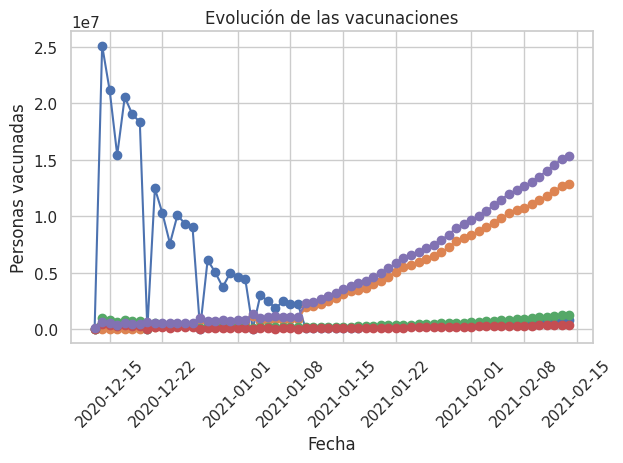

In [ ]:
import matplotlib.pyplot as plt
for pais in top_5.index:
  top5 = df[df['country'] == pais]

  # Crear el gráfico de líneas
  plt.plot(top5['date'], top5['people_vaccinated'], marker='o', linestyle='-')

# Configurar el título y etiquetas de los ejes
plt.title('Evolución de las vacunaciones')
plt.xlabel('Fecha')
plt.ylabel('Personas vacunadas')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
wales = df[df['country'] == 'Wales']

In [ ]:
wales = ds[ds['country'] == 'Wales']

In [ ]:
wales[wales['people_vaccinated'] == 0]

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website


Graficamos la evolución en el tiempo de ellos.

In [ ]:
wales = df[df['country'] == 'Wales']
wales

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
3144,Wales,NaN,2020-12-13,8207.0,8.207000e+03,NaN,NaN,NaN,0.26,0.26,NaN,NaN,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3145,Wales,NaN,2020-12-14,NaN,2.511887e+07,NaN,NaN,2223.0,NaN,NaN,NaN,705.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3146,Wales,NaN,2020-12-15,NaN,2.113978e+07,NaN,NaN,2223.0,NaN,NaN,NaN,705.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3147,Wales,NaN,2020-12-16,NaN,1.542228e+07,NaN,NaN,2223.0,NaN,NaN,NaN,705.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3148,Wales,NaN,2020-12-17,NaN,2.056031e+07,NaN,NaN,2223.0,NaN,NaN,NaN,705.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3203,Wales,NaN,2021-02-10,687892.0,6.840970e+05,3795.0,28786.0,28015.0,21.82,21.70,0.12,8886.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3204,Wales,NaN,2021-02-11,719954.0,7.159440e+05,4010.0,32062.0,27897.0,22.83,22.71,0.13,8848.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3205,Wales,NaN,2021-02-12,753669.0,7.494450e+05,4224.0,33715.0,27743.0,23.90,23.77,0.13,8799.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...
3206,Wales,NaN,2021-02-13,776224.0,7.716510e+05,4573.0,22555.0,26285.0,24.62,24.47,0.15,8337.0,"Oxford/AstraZeneca, Pfizer/BioNTech",Government of the United Kingdom,https://coronavirus.data.gov.uk/details/health...


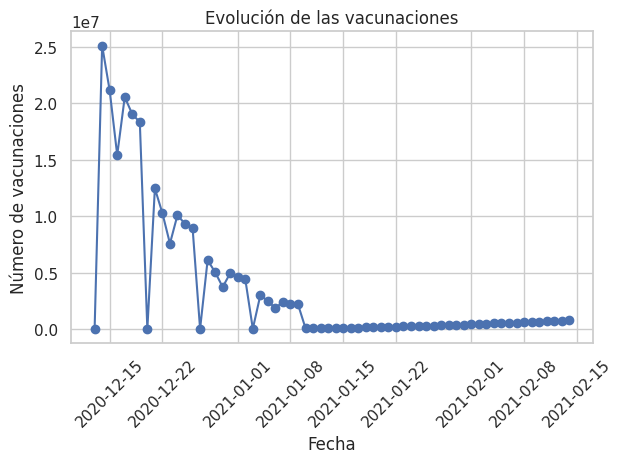

In [ ]:
# Crear el gráfico de líneas
plt.plot(wales['date'], wales['people_vaccinated'], marker='o', linestyle='-')

# Configurar el título y etiquetas de los ejes
plt.title('Evolución de las vacunaciones')
plt.xlabel('Fecha')
plt.ylabel('Número de vacunaciones')

# Rotar las etiquetas del eje x para mejorar la legibilidad
plt.xticks(rotation=45)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

## **PRÁCTICA 2 (Sensores atmosféricos)**

### **Enunciado**

Se cuenta con los datos del año 2020 de distintas mediciones de un sensor medioambiental situado en el
campus de la Universidad Francisco de Vitoria. Para analizar la información recogida haremos uso de un
dataset proporcionado por la propia Universidad llamado “ozone”.

Importamos las librerías necesarias y el archivo.

In [ ]:
# Limpiar variables
%reset -f

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
from io import StringIO
from sklearn.preprocessing import MinMaxScaler

# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/CeliaDiazSanchez/Data-Mining/LAB01/ozone.csv"

# Realizar la solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Leer el contenido del archivo como texto
    csv_text = response.text

    # Eliminar las comillas del contenido
    csv_text = csv_text.replace('"', '')

    # Leer el contenido procesado como un DataFrame de pandas
    df = pd.read_csv(StringIO(csv_text))

    print("Archivo descargado y procesado exitosamente.")
    print(df.columns)
else:
    print("Error al descargar el archivo.")

df.head()

Archivo descargado y procesado exitosamente.
Index(['Month', 'Day_of_month', 'Day_of_week', 'ozone_reading',
       'pressure_height', 'Wind_speed', 'Humidity', 'Temperature_Sandburg',
       'Temperature_ElMonte', 'Inversion_base_height', 'Pressure_gradient',
       'Inversion_temperature', 'Visibility'],
      dtype='object')


,Month,Day_of_month,Day_of_week,ozone_reading,pressure_height,Wind_speed,Humidity,Temperature_Sandburg,Temperature_ElMonte,Inversion_base_height,Pressure_gradient,Inversion_temperature,Visibility
0,1,5,1,5.34,5760,3,51,54,45.32,1450,25,57.02,60
1,1,6,2,5.77,5720,4,69,35,49.64,1568,15,53.78,60
2,1,7,3,3.69,5790,6,19,45,46.40,2631,-33,54.14,100
3,1,8,4,3.89,5790,3,25,55,52.70,554,-28,64.76,250
4,1,9,5,5.76,5700,3,73,41,48.02,2083,23,52.52,120


### **Ejercicio 1**
Llevar a cabo el estudio de los outliers de 3 variables (Wind_speed, Ozone_reading,
Visibility) de forma unidimensional. ¿Qué tipo de gráfico es necesario emplear? Interpretar los datos
obtenidos en cada caso.

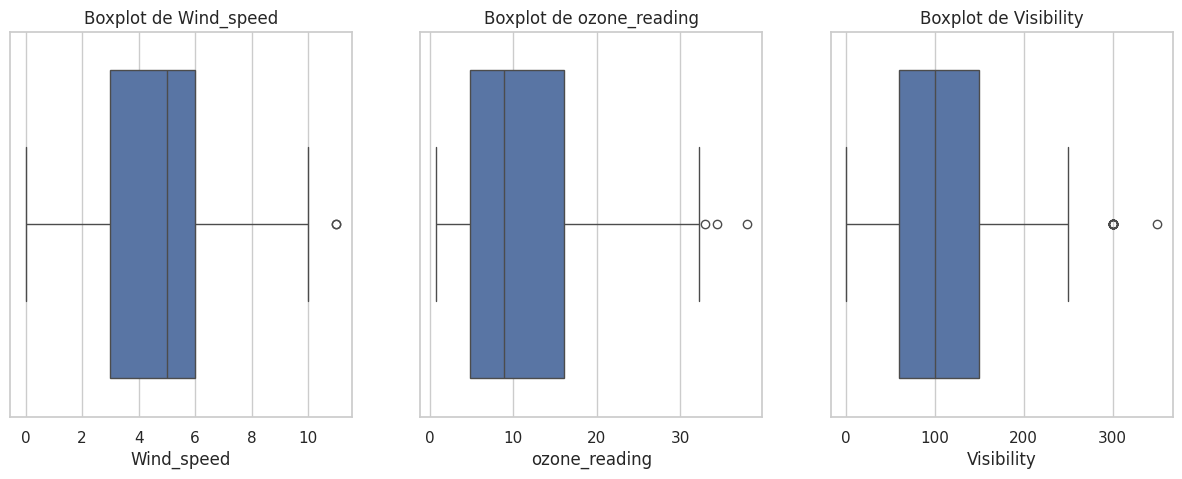

In [ ]:
# Variables a estudiar
variables = ["Wind_speed", "ozone_reading", "Visibility"]

# Crear subplots
fig, axes = plt.subplots(nrows=1, ncols=len(variables), figsize=(15, 5))

# Iterar sobre las variables y crear los diagramas de cajas en cada subplot
for i, var in enumerate(variables):
    sns.boxplot(x=df[var], ax=axes[i])
    axes[i].set_title(f"Boxplot de {var}")

plt.show()

Vemos que hay 1, 3 y en el ultimo por lo menos dos outliers, respectivamente. Sin embargo, en el último habrá bastantes más ya que el círculo se marca bastante negro.

En Visibility, la mediana parece que está bastante centrada en comparación con las otras dos variables. En ozone_reading es donde podemos observar bastante más variación de los datos.

Vamos a imprimir un resumen estadístico de cada una de las 3 variables y calcular el número de outliers para obtener información más precisa y verificar nuestras suposiciones.

In [ ]:
# Obtener resumen estadístico
resumen_estadistico = df[variables].describe()

# Imprimir el resumen estadístico
print(resumen_estadistico)

       Wind_speed  ozone_reading  Visibility
count  203.000000     203.000000  203.000000
mean     4.866995      11.373990  122.197044
std      2.105402       8.192652   81.171317
min      0.000000       0.720000    0.000000
25%      3.000000       4.770000   60.000000
50%      5.000000       8.900000  100.000000
75%      6.000000      16.075000  150.000000
max     11.000000      37.980000  350.000000


Para calcular los outliers, utilizaremos la regla del rango intercuartílico (IQR) visto en clase.

In [ ]:
for var in variables:
    Q1 = df[var].quantile(0.25)
    Q3 = df[var].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers_count = len(df[(df[var] < lower_bound) | (df[var] > upper_bound)])
    print(f"Rango de outliers en {var}: ({lower_bound}, {upper_bound})")
    print(f"Número de outliers en {var}: {outliers_count}")

Rango de outliers en Wind_speed: (-1.5, 10.5)
Número de outliers en Wind_speed: 2
Rango de outliers en ozone_reading: (-12.1875, 33.0325)
Número de outliers en ozone_reading: 3
Rango de outliers en Visibility: (-75.0, 285.0)
Número de outliers en Visibility: 17


Con los datos obtenidos en el resumen estadístico y la información sobre los outliers, podemos confirmar lo que intuíamos gráficamente, pero de forma más precisa:

1. **Wind_speed:**
   - El 75% de las observaciones de velocidad del viento están por debajo de 6 unidades, mientras que el rango para identificar outliers es (-1.5, 10.5).
   - Hay 2 outliers en la velocidad del viento, lo que indica que existen velocidades de viento extremadamente altas.
   - El viento presenta una velocidad media de aproximadamente 4.87 unidades, con una variabilidad moderada representada por la desviación estándar de alrededor de 2.11 unidades.

2. **ozone_reading:**
   - La lectura de ozono tiene un rango intercuartílico (IQR) entre el percentil 25% y el percentil 75%) de aproximadamente (4.77, 16.08), y el rango para identificar outliers es (-12.1875, 33.0325).
   - Hay 3 outliers en las lecturas de ozono, sugiriendo la presencia de valores atípicos en las concentraciones de ozono.
   - La lectura de ozono tiene una media de aproximadamente 11.37 unidades, con una variabilidad considerable representada por la desviación estándar de alrededor de 8.19 unidades.

3. **Visibility:**
   - El rango intercuartílico (IQR) para la visibilidad es aproximadamente (60, 150), y el rango para identificar outliers es (-75.0, 285.0).
   - Se observan 17 outliers en la visibilidad, lo que indica la presencia de valores atípicos en las mediciones de visibilidad.
   - La visibilidad promedio es de alrededor de 122.20 unidades, con una variabilidad significativa representada por la desviación estándar de aproximadamente 81.17 unidades.

### **Ejercicio 2**
Estudiar la intersección y la unión de outliers entre las variables “Wind_speed” y
“Visibility”.

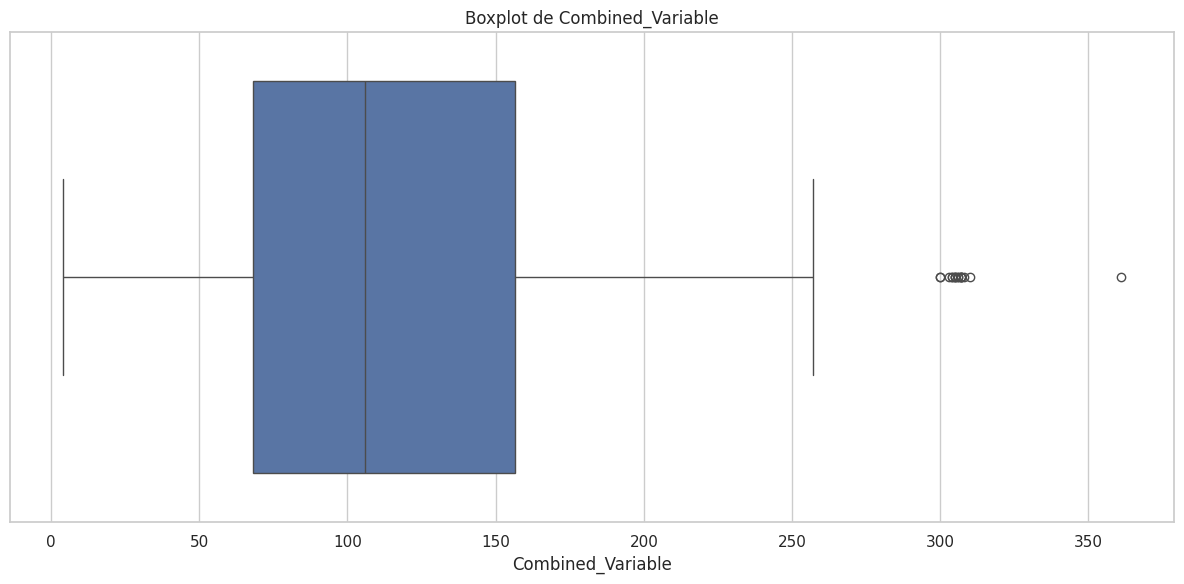

In [ ]:
# Crear una nueva variable combinada
df["Combined_Variable"] = df["Wind_speed"] + df["Visibility"]

# Identificar outliers para la variable combinada
combined_outliers = df[df["Combined_Variable"] > df["Combined_Variable"].quantile(0.75) + 1.5*(df["Combined_Variable"].quantile(0.75) - df["Combined_Variable"].quantile(0.25))]

# Crear diagrama de caja y dispersión con resaltado de outliers
plt.figure(figsize=(12, 6))

# Boxplot de la variable combinada
sns.boxplot(x=df["Combined_Variable"])
plt.title("Boxplot de Combined_Variable")

plt.tight_layout()
plt.show()

Podemos observar que los outliers se amontonan y tienen más o menos los mismos valores en la variable combinada.

Vamos a repetir el mismo procedimiento con la variable combinada.

In [ ]:
# Obtener resumen estadístico
resumen_estadistico = df["Combined_Variable"].describe()

# Imprimir el resumen estadístico
print(resumen_estadistico)

count    203.000000
mean     127.064039
std       81.293995
min        4.000000
25%       68.000000
50%      106.000000
75%      156.500000
max      361.000000
Name: Combined_Variable, dtype: float64


Hagamos una breve interpretación de los datos obtenidos en el resumen:
   - **Media (mean):** La media de "Combined_Variable" es 127.06, lo que indica la suma promedio de "Wind_speed" y "Visibility" para las observaciones en tus datos.

   - **Desviación estándar (std):** La desviación estándar de 81.29 sugiere una variabilidad considerable en la suma de estas dos variables.

Entonces, al combinar variables, los outliers pueden sumarse, restarse o mantenerse similares, dependiendo de la relación entre las variables originales.

Vamos a dibujar un gráfico de dispersión para observar cómo se comporta la unión de las dos variables en comparación con la intersección.

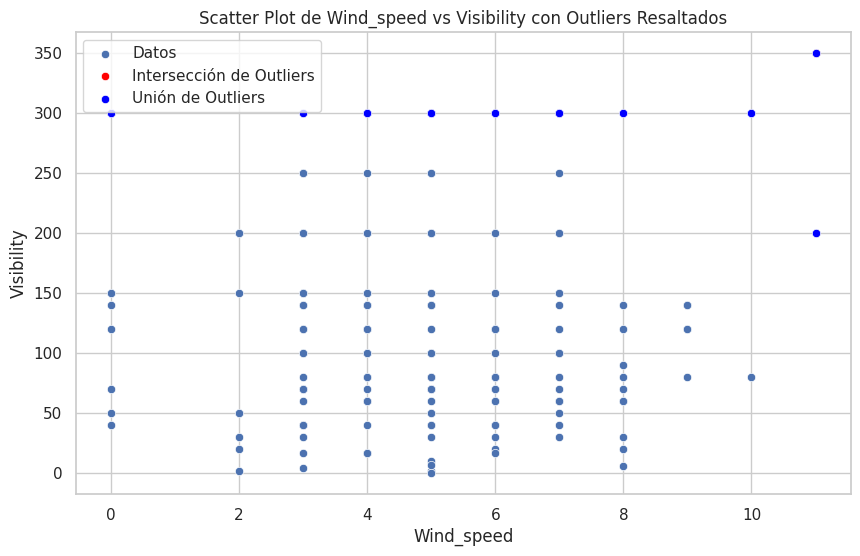

In [ ]:
# Variables a estudiar
variables = ["Wind_speed", "Visibility"]

# Identificar outliers para Wind_speed y Visibility
Q1_ws = df["Wind_speed"].quantile(0.25)
Q3_ws = df["Wind_speed"].quantile(0.75)
IQR_ws = Q3_ws - Q1_ws

lower_bound_ws = Q1_ws - 1.5 * IQR_ws
upper_bound_ws = Q3_ws + 1.5 * IQR_ws

outliers_ws = df[(df["Wind_speed"] < lower_bound_ws) | (df["Wind_speed"] > upper_bound_ws)]

Q1_vis = df["Visibility"].quantile(0.25)
Q3_vis = df["Visibility"].quantile(0.75)
IQR_vis = Q3_vis - Q1_vis

lower_bound_vis = Q1_vis - 1.5 * IQR_vis
upper_bound_vis = Q3_vis + 1.5 * IQR_vis

outliers_vis = df[(df["Visibility"] < lower_bound_vis) | (df["Visibility"] > upper_bound_vis)]

# Intersección y unión de outliers
intersection = pd.merge(outliers_ws, outliers_vis, how="inner")
union = pd.merge(outliers_ws, outliers_vis, how="outer")

# Crear gráfico de dispersión con resaltado de outliers
plt.figure(figsize=(10, 6))

# Scatter plot para Wind_speed vs Visibility
sns.scatterplot(x=df["Wind_speed"], y=df["Visibility"], label='Datos')
sns.scatterplot(x=intersection["Wind_speed"], y=intersection["Visibility"], color='red', label='Intersección de Outliers')
sns.scatterplot(x=union["Wind_speed"], y=union["Visibility"], color='blue', label='Unión de Outliers')
plt.title("Scatter Plot de Wind_speed vs Visibility con Outliers Resaltados")
plt.xlabel("Wind_speed")
plt.ylabel("Visibility")
plt.legend()
plt.show()

Podemos observar que la unión nos da bastantes outliers, mientras que, sin embargo, en la intersección, no tenemos ningún outlier. La ausencia de puntos de intersección podría indicar que los outliers en una variable no están relacionados con los outliers en la otra variable. En otras palabras, eventos extremos o inusuales en una variable no están coincidiendo con eventos extremos en la otra variable.

### **Ejercicio 3**

Categoriza algunas de las variables y lleva a cabo representaciones que nos permitan
relacionar diferentes variables ¿Qué nos dicen los datos?

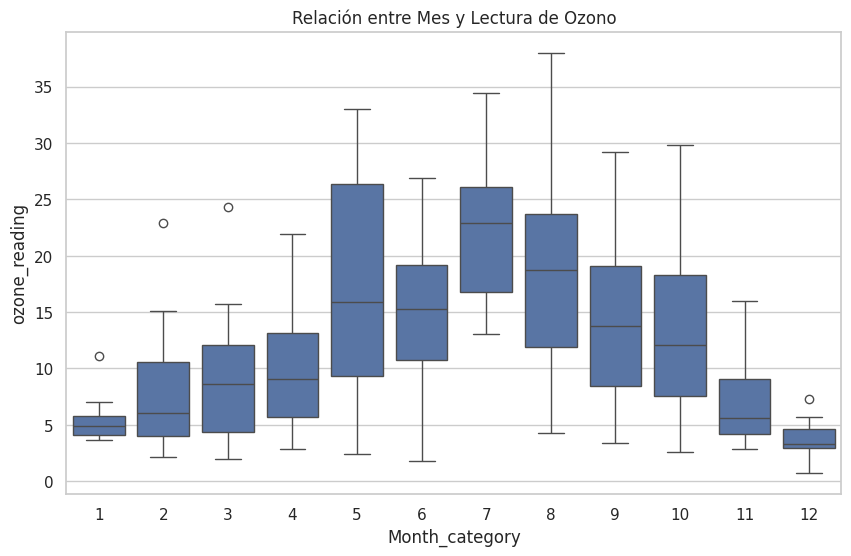

In [ ]:
# Categorizar la variable 'Month'
df['Month_category'] = pd.Categorical(df['Month'], categories=[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], ordered=True)

# Relación entre Month y Ozone_reading
plt.figure(figsize=(10, 6))
sns.boxplot(x='Month_category', y='ozone_reading', data=df)
plt.title('Relación entre Mes y Lectura de Ozono')
plt.show()

Algunas conclusiones que hemos podido sacar a simple vista son:

1. **Tendencias en la Media (mean):**
   - La media varía significativamente de un mes a otro, indicando diferencias en los niveles promedio de ozono a lo largo del año.
   - Los meses 7 (julio) y 8 (agosto) tienen las medias más altas, sugiriendo que estos meses podrían tener niveles más altos de ozono en comparación con otros meses. Esto tiene sentido ya que la gente estaría de vacaciones y recurriría más al transporte en general, lo que aumentaría las emisiones de ozono.

2. **Dispersión de Datos (std):**
   - Los meses 5 (mayo) y 7 (julio) muestran una mayor dispersión, lo que sugiere una mayor variabilidad en los niveles de ozono en estos meses.

3. **Distribución:**
   - Los percentiles muestran la distribución de los datos. La mediana (50%) indica la posición central de los datos.
   - Por ejemplo, el mes 7 (julio) tiene un 75% de los datos por encima de aproximadamente 16.5, lo que indica una distribución sesgada hacia valores más altos.

4. **Outliers (min y max):**
   - Los valores mínimos y máximos indican la presencia de outliers extremos en algunos meses.
   - El mes 8 (agosto) tiene el valor máximo más alto, un poco menos de 38, y el mes 12 (diciembre) tiene el valor mínimo más bajo, un poco más de 0.5.

Estos resultados nos sugieren variaciones estacionales en los niveles de ozono, con algunos meses mostrando niveles más altos y otros mostrando una mayor variabilidad.

Realicemos lo mismo con Day_of_week y Ozone_reading

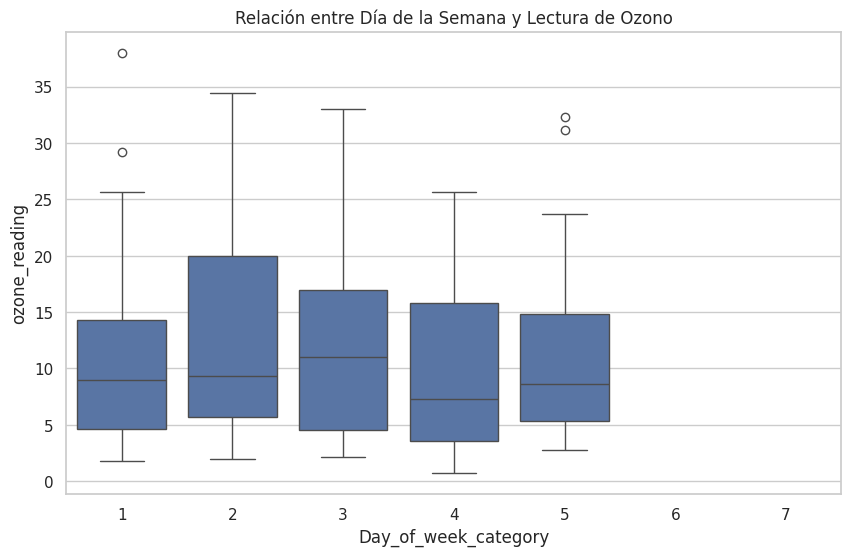

In [ ]:
# Categorizar la variable 'Day_of_week'
df['Day_of_week_category'] = pd.Categorical(df['Day_of_week'], categories=[1, 2, 3, 4, 5, 6, 7], ordered=True)

# Relación entre Day_of_week y Ozone_reading
plt.figure(figsize=(10, 6))
sns.boxplot(x='Day_of_week_category', y='ozone_reading', data=df)
plt.title('Relación entre Día de la Semana y Lectura de Ozono')
plt.show()

El diagrama de cajas previo nos proporciona información sobre la distribución de los niveles de ozono para cada día de la semana. Estas son algunas de las conclusiones clave que hemos podido sacar:

1. **Tendencias en la Media (mean):**
   - La media varía entre los días de la semana, indicando posibles diferencias en los niveles promedio de ozono según el día.
   - Los días 2 (martes) y 5 (viernes) muestran las medias más altas, sugiriendo que estos días podrían tener niveles más altos de ozono en comparación con otros días.

2. **Dispersión de Datos (std):**
   - La desviación estándar indica la variabilidad de los datos alrededor de la media.
   - Los días 2 (martes) y 5 (viernes) muestran una mayor dispersión, lo que sugiere una mayor variabilidad en los niveles de ozono en estos días.

3. **Distribución:**
   - Los percentiles muestran la distribución de los datos. La mediana (50%) indica la posición central de los datos.
   - Los días 5 (viernes) y 2 (martes) tienen medianas más altas, indicando una distribución sesgada hacia valores más altos.

4. **Outliers:**
   - Los valores mínimos y máximos indican la presencia de outliers extremos en algunos días.
   - El día 1 (lunes) tiene el valor máximo más alto, 38, y el día 4 (jueves) tiene el valor mínimo más bajo.

5. **Datos Faltantes (NaN):**
   - Los días 6 y 7 no tienen datos (NaN), lo que indica que no hay observaciones para estos días. Habría que considerar filtrar nuestra base de datos para evitar sesgos.

Estos resultados nos sugieren variaciones en los niveles de ozono según el día de la semana, con algunos días mostrando niveles más altos y otros mostrando una mayor variabilidad. Los días 2 (martes) y 5 (viernes) parecen tener medias y medianas más altas, indicando posiblemente una mayor concentración de ozono en esos días. La presencia de outliers también indica la posibilidad de eventos excepcionales en ciertos días. Sin embargo, se debe tener precaución al interpretar estos resultados debido a la falta de datos para los días 6 y 7.

### **Ejercicio 4**

Se desea saber cómo se distribuyen y cuáles son las frecuencias de las principales variables
respecto a los días de medición. Lleva a cabo la representación más útil (sólo una). Justificar la respuesta.


<Figure size 1200x800 with 0 Axes>

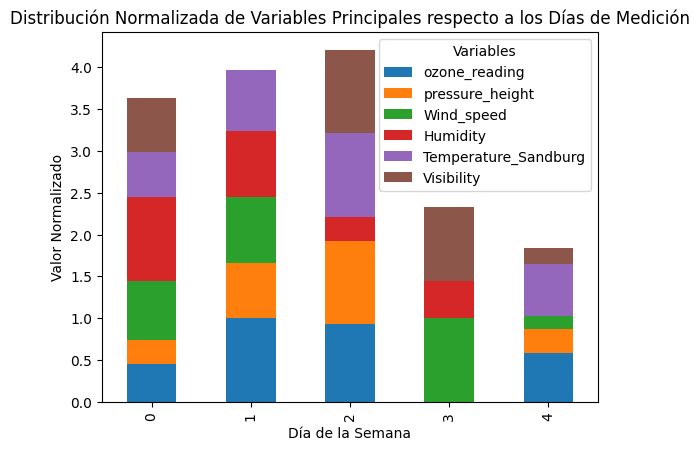

In [ ]:
# Seleccionar las variables a representar
variables_principales = ["ozone_reading", "pressure_height", "Wind_speed", "Humidity", "Temperature_Sandburg", "Visibility"]

# Crear un DataFrame auxiliar con las variables seleccionadas y la variable 'Day_of_week'
df_principales = df[["Day_of_week"] + variables_principales]

# Agrupar por día de la semana y calcular la media de cada variable
df_principales_grouped = df_principales.groupby("Day_of_week").mean()

# Normalizar los datos
scaler = MinMaxScaler()
df_principales_normalized = pd.DataFrame(scaler.fit_transform(df_principales_grouped[variables_principales]), columns=variables_principales)

# Crear un gráfico de barras
plt.figure(figsize=(12, 8))
df_principales_normalized[variables_principales].plot(kind='bar', stacked=True)
plt.title('Distribución Normalizada de Variables Principales respecto a los Días de Medición')
plt.xlabel('Día de la Semana')
plt.ylabel('Valor Normalizado')
plt.legend(title='Variables')
plt.show()

Decidimos normalizar los datos ya que no se veía muy bien utilizando los datos directamente, y como todos son numéricos nos pareció una buena decisión.



A simple vista se puede observar que no hay mucha variabilidad de los datos.

El análisis de las principales variables meteorológicas revela condiciones estables y moderadas a lo largo del periodo medido. La concentración de ozono, altura de presión, velocidad del viento, humedad, temperatura en Sandburg y visibilidad no muestran extremos significativos, manteniéndose en rangos consistentes.

La baja variabilidad en estas variables sugiere una relativa estabilidad climática y condiciones atmosféricas constantes. Estos resultados indican un entorno meteorológico equilibrado y sin fluctuaciones notables durante el período estudiado, proporcionando una visión general de la estabilidad en las mediciones registradas.

<Figure size 1200x800 with 0 Axes>

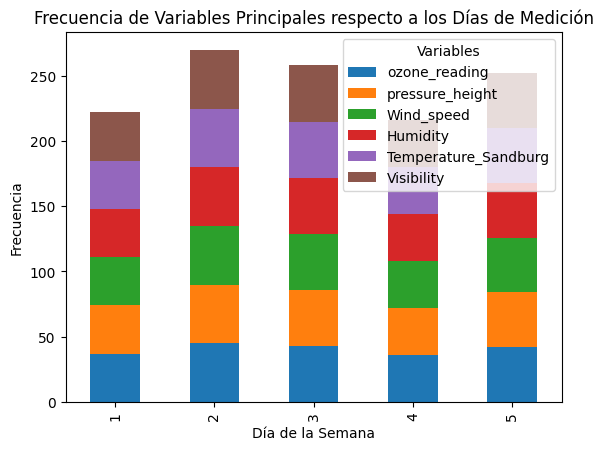

In [ ]:
# Conteo de frecuencias de las variables principales para cada día de la semana
df_principales_count = df_principales.groupby("Day_of_week").count()

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 8))
df_principales_count[variables_principales].plot(kind='bar', stacked=True)
plt.title('Frecuencia de Variables Principales respecto a los Días de Medición')
plt.xlabel('Día de la Semana')
plt.ylabel('Frecuencia')
plt.legend(title='Variables')
plt.show()

## **PRÁCTICA 3 (Reducción de la dimensionalidad)**

### **Enunciado**

Existen casos en que las variables no se pueden representar visualmente debido a que necesitaríamos varias
dimensiones para ello. Para evitar esto, existe una metodología en la cual, un set de datos multidimensional,
podemos transformarlo para poder explicar gran parte de la información en 2 o 3 dimensiones. Dicha
metodología se conoce con el nombre de Principal Component Analysis (PCA). Vamos a aplicarlo a un set de
datos que está colgado en Canvas llamado USA.xlsx y vamos a dar una serie de explicaciones de que ocurre.

Importamos las librerías necesarias y el fichero, en este caso .xlsx en vez de .csv. Para ello, cambiamos la penúltima línea por read_excel en vez de read_csv.

In [138]:
# Limpiar variables
%reset -f

import requests
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# URL del archivo CSV en GitHub
url = "https://raw.githubusercontent.com/CeliaDiazSanchez/Data-Mining/LAB01/USA.xlsx"
# Realizar la solicitud GET para obtener el contenido del archivo
response = requests.get(url)

# Verificar si la solicitud fue exitosa (código de estado 200)
if response.status_code == 200:
    # Guardar el contenido del archivo en un archivo local
    with open('USA.xlsx', 'wb') as f:
        f.write(response.content)
    print("Archivo descargado exitosamente.")
else:
    print("Error al descargar el archivo.")

# Cargar el archivo CSV en un DataFrame de pandas
df = pd.read_excel('USA.xlsx')
df.head(5)

Archivo descargado exitosamente.


,Ciudad,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias
0,Phoenix,10.0,70.3,213.0,582.0,6.0,7.05,36.0
1,Little Rock,13.0,61.0,91.0,132.0,8.2,48.52,100.0
2,San Francisco,12.0,56.7,453.0,716.0,8.7,20.66,67.0
3,Denver,17.0,51.9,454.0,515.0,9.0,12.95,86.0
4,Hartford,56.0,49.1,412.0,158.0,9.0,43.37,127.0


# Exploración de la base de datos

Hemos guardado en el DataFrame `df` una base de datos que combina información demográfica, climática y ambiental sobre varias ciudades de Estados Unidos.


In [139]:
df.shape

(41, 8)

Se trata de un DataFrame con 41 filas u observaciones y 8 columnas o variables. Procedemos a analizarlas:

In [140]:
df.columns

Index(['Ciudad', 'SO2', 'Neg.Temp', 'Empresas', 'Poblacion', 'Viento',
       'Precip', 'Dias'],
      dtype='object')

- **Ciudad**: el nombre de la ciudad de Estados Unidos.
- **SO2**: la concentración de dióxido de azufre (SO2) en partes por millón (ppm). El dióxido de azufre es un gas irritante y corrosivo que puede ser emitido por actividades industriales y vehiculares, entre otras fuentes.
- **Neg.Temp**: la temperatura media mínima en grados Fahrenheit durante un período específico. Esto puede ser importante para comprender el clima de la ciudad.
- **Empresas**: el número de empresas en la ciudad.
- **Población**: la población total de la ciudad.
- **Viento**: la velocidad media del viento en millas por hora (mph). El viento puede influir en la dispersión de contaminantes atmosféricos y en el clima local.
- **Precip**: la cantidad total de precipitación (lluvia) en pulgadas.
- **Días**: el número de días con precipitación.

Veamos de qué tipo son cada una de las variables.

In [141]:
print(df.dtypes)

Ciudad        object
SO2          float64
Neg.Temp     float64
Empresas     float64
Poblacion    float64
Viento       float64
Precip       float64
Dias         float64
dtype: object


Concretamente, nos queremos asegurar de que no haya ningún error de transcripción en el nombre de las ciudades.

Utilizaremos la función `unique()`, habiendo ordenado antes el DataFrame alfabéticamente.

In [142]:
df = df.sort_values(by='Ciudad')
df['Ciudad'].unique()

array(['Albany', 'Alburquerque', 'Atlanta', 'Baltimore', 'Buffalo',
       'Charleston', 'Chicago', 'Cincinnati', 'Cleveland', 'Columbus',
       'Dallas', 'Denver', 'Des Moines', 'Detroit', 'Hartford', 'Houston',
       'Indianapolis', 'Jacksonville', 'Kansas City', 'Little Rock',
       'Louisville', 'Memphis', 'Miami', 'Milwaukee',
       'Minneapolis-St.Paul', 'Nashville', 'New Orleans', 'Norfolk',
       'Omaha', 'Philadelphia', 'Phoenix', 'Pittsburgh', 'Providence',
       'Richmond', 'Salt Lake City', 'San Francisco', 'Seattle',
       'St. Louis', 'Washington', 'Wichita', 'Wilmington'], dtype=object)

Podemos ver que todas las ciudades están escritas correctamente, y para ver si alguna se repite:

In [143]:
df['Ciudad'].unique().size == df.shape[0]

True

El número de ciudades únicas coincide con el número de filas del DataFrame, por lo que no debe haber ninguna ciudad repetida ni ningún NaN en la columna. Igualmente comprobamos los NaN para todas las columnas.

In [144]:
df.isna().sum()

Ciudad       0
SO2          0
Neg.Temp     0
Empresas     0
Poblacion    0
Viento       0
Precip       0
Dias         0
dtype: int64

No hay ningún valor NaN que pueda ocasionar problemas en el estudio de los datos.

Como cada fila contiene información sobre una ciudad distinta, convertimos la variable **Ciudad** en el índice del DataFrame.

In [145]:
df = df.set_index('Ciudad')
df.head(3)

,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias
Ciudad,,,,,,,
Albany,46.0,47.6,44.0,116.0,8.8,33.36,135.0
Alburquerque,11.0,56.8,46.0,244.0,8.9,7.77,58.0
Atlanta,24.0,61.5,368.0,497.0,9.1,48.34,115.0


A continuación usamos boxplots para visualizar los datos, y asegurarnos de que ningún dato está fuera del rango.

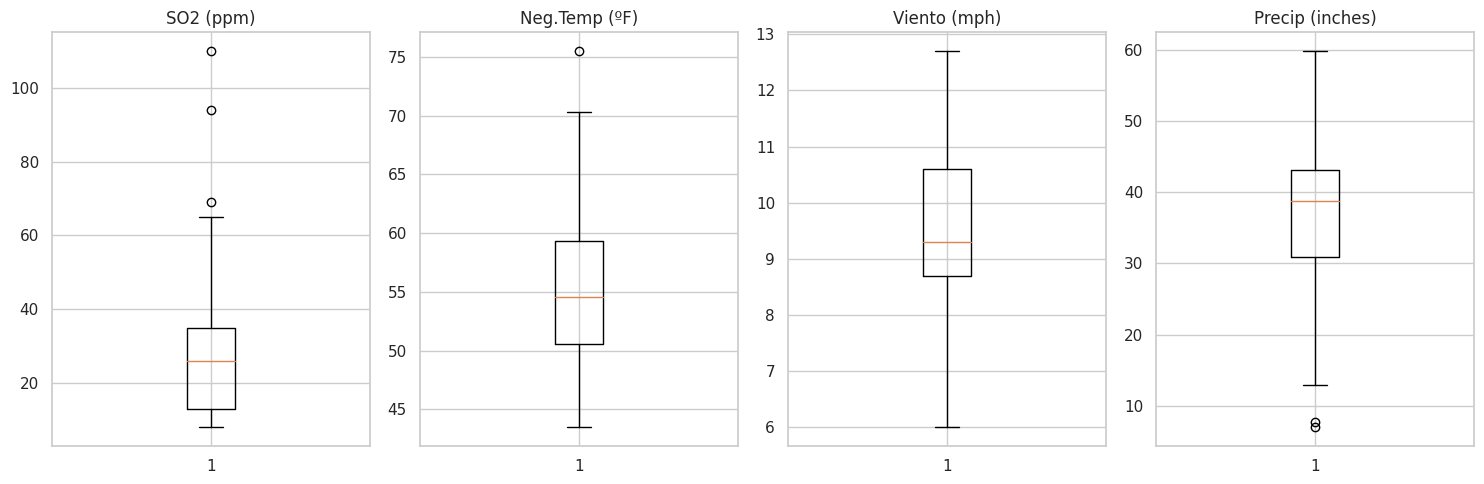

In [152]:
import matplotlib.pyplot as plt

# Crear subplots para cada columna del DataFrame
fig, axs = plt.subplots(nrows=1, ncols=4, figsize=(15, 5))

# Iterar sobre cada columna y dibujar un boxplot en el subplot correspondiente
columnas = ['SO2', 'Neg.Temp', 'Viento', 'Precip']
unidades = ['ppm', 'ºF', 'mph', 'inches']
for i, columna in enumerate(columnas):
    axs[i].boxplot(df[columna])
    axs[i].set_title(columna + ' (' + unidades[i] + ')')  # Concatenar nombre de la columna y unidad

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar los subplots
plt.show()


Un rango aproximado para cada una de las variables, según ChatGpt:
- **SO2**: [0, 100] en ppm

- **Neg.Temp:** [-100, 120] en ºF

- **Empresas, población y días**: [sin límite mínimo especíco, sin límite máximo específico]

- **Viento**: [0, 200] mph

- **Precip**: [0, 50] pulgadas

Estos rangos son aproximados y pueden variar dependiendo del contexto específico de cada ciudad y de otros factores ambientales y geográficos. Por lo que los valores extremos de los boxplots entran dentro del dominio de manera aproximada, solo superan el dominio la cantidad de SO2 y las Precipitaciones, pero por una diferencia aceptable.

### **Ejercicio 1**

Lo primero que habrá que hacer será estandarizar los datos para que las diferencias de rango
no supongan un problema a la hora de procesar la información. Usa para ello el método StandardScaler de
la librería scikit-learn.

1. Leemos el archivo Excel en un DataFrame de `pandas`.

2. Seleccionamos las columnas que queremos estandarizar. En este ejemplo, seleccionaremos todas las columnas numéricas.

3. Creamos un objeto `StandardScaler`.

4. Estandarizamos las columnas seleccionadas utilizando el método `fit_transform`.
Muestra las primeras filas del DataFrame estandarizado.

Al estandarizar, centramos los datos para que tengan una media de 0 y escalándolos para que tengan una desviación estándar de 1. Esto ayuda a manejar las diferencias de rango y facilita el procesamiento de la información.

In [157]:
# Seleccionar las columnas que deseas estandarizar (aquí se usan todas las columnas numéricas)
columns_to_standardize = df.select_dtypes(include=['float64', 'int64']).columns

# Crear un objeto StandardScaler
scaler = StandardScaler()

# Estandarizar las columnas seleccionadas
df[columns_to_standardize] = scaler.fit_transform(df[columns_to_standardize])

# Mostrar las primeras filas del DataFrame estandarizado
df.head(10)

,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias
Ciudad,,,,,,,
Albany,0.688019,-1.143491,-0.753014,-0.861195,-0.456308,-0.293196,0.805829
Alburquerque,-0.821626,0.145200,-0.749421,-0.637422,-0.385442,-2.494087,-2.135215
Atlanta,-0.260900,0.803553,-0.170867,-0.195120,-0.243710,0.995172,0.041922
Baltimore,0.731152,-0.106935,0.290899,0.518158,0.110620,0.390551,-0.110860
Buffalo,-0.821626,-1.213528,-0.129541,-0.254559,2.094868,-0.056680,1.989886
Charleston,0.041029,-0.078920,-0.769185,-0.939866,-2.086225,0.342387,1.302369
Chicago,3.448513,-0.723266,5.176267,4.825797,0.677548,-0.200310,0.309289
Cincinnati,-0.304033,-0.247010,-0.001972,-0.272042,-1.661030,0.195317,0.691243
Cleveland,1.507541,-0.849333,0.977258,0.248931,1.031878,-0.153007,1.569737


### **Ejercicio 2**

El segundo paso será a partir de los datos anteriores, obtener los autovalores (eigenvalues) y
los autovectores (eigenvectors) que nos permitan explicar cuántos componentes necesitamos para
representar los datos iniciales. Para ello, en primer lugar, habrá que obtener la matriz de covarianza
mediante el método cov de Numpy y después aplicarle a dicha matriz el método linalg.eig también de
NumPy. Obtén un DataFrame con el porcentaje de varianza y el acumulado por cada componente. Explica
qué quieren decir estos datos. ¿Cuánta información perdemos con 2 componentes? ¿Cuánta información
representamos con 3 componentes?

Para obtener los autovalores (eigenvalues) y autovectores (eigenvectors) que nos permitan determinar cuántos componentes principales necesitamos para representar los datos iniciales, seguiremos los siguientes pasos:

In [194]:
# Seleccionar las columnas que deseas incluir en el análisis de componentes principales
columns_for_pca = df.select_dtypes(include=['float64', 'int64']).columns

# Obtener la matriz de covarianza
cov_matrix = np.cov(df[columns_for_pca], rowvar=False)

# Obtener autovalores y autovectores
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

# Ordenar los autovalores y autovectores de mayor a menor
sorted_indices = np.argsort(eigenvalues)[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

# Calcular el porcentaje de varianza y el acumulado por cada componente
porcentaje_varianza = (eigenvalues / np.sum(eigenvalues)).round(3)
porcentaje_varianza_acumulada = (np.cumsum(porcentaje_varianza)).round(3)

# Crear un DataFrame con el porcentaje de varianza y el acumulado por cada componente
pca_results = pd.DataFrame({
    'Autovalor' : eigenvalues.round(2),
    '% Varianza': porcentaje_varianza*100,
    '% Varianza Acumulada': porcentaje_varianza_acumulada*100
}, index=[f'PC {i+1}' for i in range(len(porcentaje_varianza))])  # Establecer el índice como 'PC i', Componente Principal


# Mostrar el DataFrame con los resultados
pca_results

,Autovalor,% Varianza,% Varianza Acumulada
PC 1,2.80,39.0,39.0
PC 2,1.55,21.6,60.6
PC 3,1.43,19.9,80.5
PC 4,0.91,12.7,93.2
PC 5,0.36,5.0,98.2
PC 6,0.10,1.4,99.6
PC 7,0.03,0.4,100.0


Añadiremos una columna más que contenga el porcentaje de información que aporta cada componente principal.

In [197]:
# Calcular la información aportada por cada componente
pca_results['% Informacion Aportada'] = (pca_results['Autovalor'] / pca_results['Autovalor'].sum() * 100).round(2)

# Mostrar el DataFrame con la nueva columna 'Informacion Aportada'
pca_results

,Autovalor,% Varianza,% Varianza Acumulada,% Informacion Aportada
PC 1,2.80,39.0,39.0,39.00
PC 2,1.55,21.6,60.6,21.59
PC 3,1.43,19.9,80.5,19.92
PC 4,0.91,12.7,93.2,12.67
PC 5,0.36,5.0,98.2,5.01
PC 6,0.10,1.4,99.6,1.39
PC 7,0.03,0.4,100.0,0.42


In [198]:
total = pca_results['% Informacion Aportada'].sum()
total

100.00000000000001

Vemos qué representa cada componente (las variables originales que tiene en cuenta).

In [199]:
# Obtener los vectores de carga
loadings = eigenvectors * np.sqrt(eigenvalues)

# Crear un DataFrame con los vectores de carga y asignar nombres a las filas
loadings_df = pd.DataFrame(loadings, columns=columns_for_pca)

# Visualizar los vectores de carga
print(loadings_df)

        SO2  Neg.Temp  Empresas  Poblacion    Viento    Precip      Dias
0  0.818885  0.105301 -0.017159  -0.386500 -0.435457  0.058784 -0.024182
1 -0.527369 -0.110358 -0.809694   0.177112 -0.096861  0.195788  0.003827
2  0.904954 -0.281233 -0.319459   0.025121  0.097836 -0.013701  0.120509
3  0.815355 -0.351108 -0.412344   0.108435  0.208134 -0.028170 -0.104975
4  0.417846  0.069065  0.372199   0.824138 -0.159932  0.048110 -0.002550
5  0.000313  0.779250 -0.588358   0.175878 -0.095748 -0.177485  0.001668
6  0.435077  0.844102  0.131030  -0.104952  0.262308  0.161894 -0.001329


Interpretación:

Dado que ya tienes la información sobre la varianza explicada por cada componente principal y los vectores de carga que indican la relación de las variables originales con cada componente, puedes interpretar cómo cada componente principal representa la información contenida en las variables originales.

- **Componente Principal 0 **:
   - **Varianza Explicada:** 38.97%
   - **Vectores de Carga:**
     - Mayor contribución positiva: SO2, Neg.Temp
     - Mayor contribución negativa: Poblacion, Viento

- **Componente Principal 1 **:
   - **Varianza Explicada:** 21.60%
   - **Vectores de Carga:**
     - Mayor contribución positiva: Poblacion, Precip
     - Mayor contribución negativa: Empresas, SO2

- **Componente Principal 2 **:
   - **Varianza Explicada:** 19.93%
   - **Vectores de Carga:**
     - Mayor contribución positiva: SO2, Dias
     - Mayor contribución negativa: Neg.Temp, Empresas

- **Componente Principal 3 **:
   - **Varianza Explicada:** 12.74%
   - **Vectores de Carga:**
     - Mayor contribución positiva: SO2, Viento
     - Mayor contribución negativa: Neg.Temp, Empresas

- **Componente Principal 4 **:
   - **Varianza Explicada:** 4.95%
   - **Vectores de Carga:**
     - Mayor contribución positiva: Poblacion, SO2
     - Mayor contribución negativa: Viento, Días

- **Componente Principal 5 **:
   - **Varianza Explicada:** 1.43%
   - **Vectores de Carga:**
     - Mayor contribución positiva: Neg.Temp, Poblacion
     - Mayor contribución negativa: Empresas, Precip

- **Componente Principal 6 **:
   - **Varianza Explicada:** 0.36%
   - **Vectores de Carga:**
     - Mayor contribución positiva: Neg.Temp, SO2
     - Mayor contribución negativa: Poblacion, Dias

Estas interpretaciones nos permite entender qué variables están más fuertemente asociadas con cada componente principal y cómo contribuyen a la variabilidad total de los datos.

In [200]:
# Proyección de los datos en el espacio de las componentes principales
pca_data = df[columns_for_pca].dot(eigenvectors)

# Añadir las componentes principales al DataFrame original
df_pca = pd.concat([df, pca_data.add_prefix('Componente_')], axis=1)
df_pca.head(3)

,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias,Componente_0,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5,Componente_6
Ciudad,,,,,,,,,,,,,,
Albany,0.688019,-1.143491,-0.753014,-0.861195,-0.456308,-0.293196,0.805829,-0.034285,0.910007,1.353106,-1.143027,-0.216931,0.036442,-0.134499
Alburquerque,-0.821626,0.145200,-0.749421,-0.637422,-0.385442,-2.494087,-2.135215,-1.816821,-2.763310,1.206725,-0.289576,-0.204473,0.270712,-0.020499
Atlanta,-0.260900,0.803553,-0.170867,-0.195120,-0.243710,0.995172,0.041922,-0.618589,0.638089,-0.988363,0.196077,-0.112149,-0.098994,0.071121


Vamos a representarlo gráficamente para ver mejor las relaciones de nuestras dos primeras componentes con nuestras variables.

Este biplot nos ayudará a interpretar cómo se distribuyen las observaciones y las variables originales en el espacio de las dos primeras componentes principales. Las flechas nos indican la dirección y la magnitud de las variables originales en el espacio de las componentes principales.

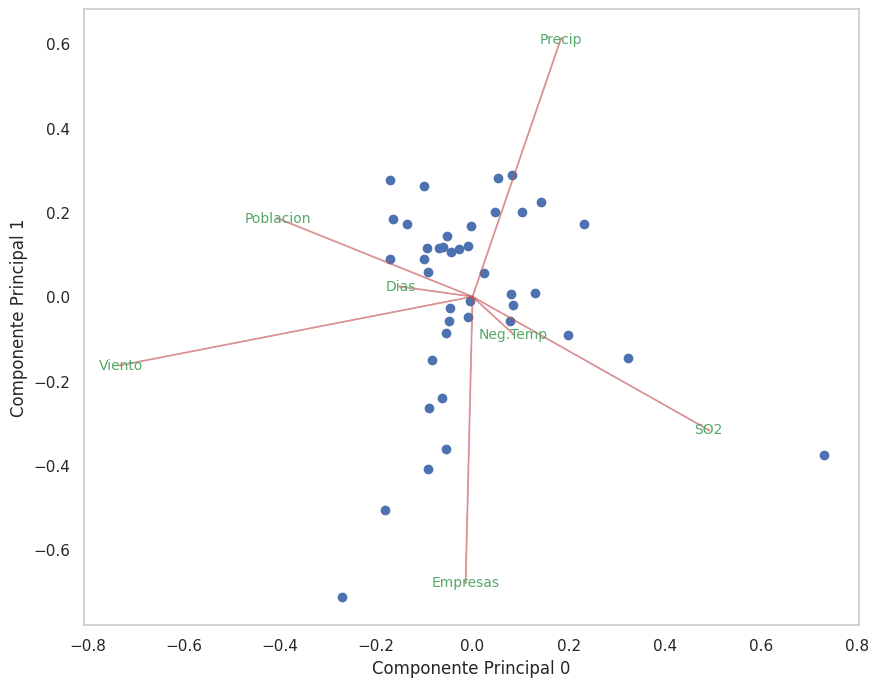

In [201]:
# Configuración de estilo para seaborn
sns.set(style="whitegrid")

# Crear un Biplot
def biplot(score, coeff, labels=None):
    # score: puntuaciones de las componentes principales
    # coeff: autovectores o cargas factoriales
    # labels: etiquetas de las variables
    plt.figure(figsize=(10, 8))
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, color='b')
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color='r', alpha=0.5)
        if labels is None:
            plt.text(coeff[i,0]* 1, coeff[i,1] * 1, "Var"+str(i+1), color='g', ha='center', va='center', fontsize=10)
        else:
            plt.text(coeff[i,0]* 1, coeff[i,1] * 1, labels[i], color='g', ha='center', va='center', fontsize=10)
    plt.xlabel("Componente Principal 0")
    plt.ylabel("Componente Principal 1")
    plt.grid()

# Biplot
biplot(np.dot(df[columns_for_pca], eigenvectors), np.transpose(eigenvectors), labels=columns_for_pca)
plt.show()

Interpretación de los resultados:

Los resultados proporcionados corresponden al análisis de componentes principales (PCA). Aquí hay una interpretación paso a paso de los datos:

**Componente 1**: Explica el 38.97% de la variabilidad en los datos.

**Componente 2**: Añade un 21.60% adicional, acumulando un 60.58% de explicación total.

**Componente 3**: Contribuye con un 19.93%, alcanzando una varianza acumulada de 80.51%.

**Componente 4**: Aporta un 12.74%, sumando hasta un 93.25% de la varianza total.

**Componente 5**: Proporciona un 4.95%, llevando la varianza acumulada al 98.20%.

**Componente 6**: Contribuye con un 1.43%, sumando un total del 99.64%.

**Componente 7**: Aporta un 0.36%, alcanzando el 100% de varianza acumulada.

Podemos una disminución gradual en el porcentaje de varianza explicada por cada componente adicional. Los que más aportan serían los cuatro primeros.

1. Seleccionamos las columnas que deseamos incluir en el análisis de componentes principales (en este caso, todas las columnas numéricas).

2. Calculamos la matriz de covarianza utilizando np.cov().

3. Obtenemos los autovalores y autovectores mediante np.linalg.eig().

4. Ordenamos los autovalores y autovectores de mayor a menor.

5. Calculamos el porcentaje de varianza explicada y la varianza acumulada por cada componente principal.

6. Creamos un DataFrame con los resultados para analizar el porcentaje de varianza explicada y la varianza acumulada por cada componente.

La varianza acumulada después de dos componentes es 60.58%.

Información perdida = 1 - 0.605779 = 0.394221

Por lo tanto, al reducir la dimensionalidad a 2 componentes, se pierde aproximadamente el 39.42% de la varianza total en los datos originales.

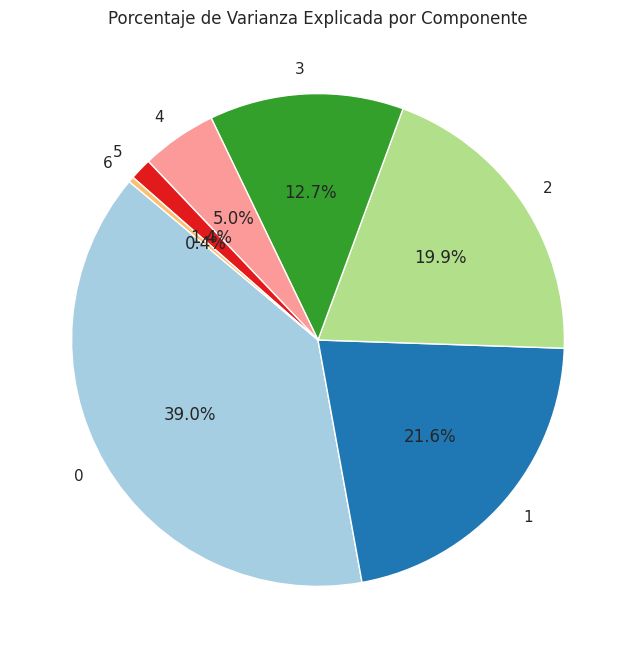

In [124]:
# Datos de ejemplo
componentes = pca_results['Componente']
varianza_explicada = pca_results['Porcentaje de Varianza']

# Crear un gráfico tipo "pie chart"
plt.figure(figsize=(8, 8))
plt.pie(varianza_explicada, labels=componentes, autopct='%0.1f%%', startangle=140, colors=plt.cm.Paired.colors)
plt.title('Porcentaje de Varianza Explicada por Componente')
plt.show()

En el DataFrame proporcionado previamente, podemos observar que la "Varianza Acumulada" para 3 componentes es 0.805061. Esto significa que el 80.51% de la varianza total en los datos originales se explica utilizando los tres primeros componentes principales.

Por lo tanto, con 3 componentes, se retiene aproximadamente el 80.51% de la información/varianza presente en los datos originales.

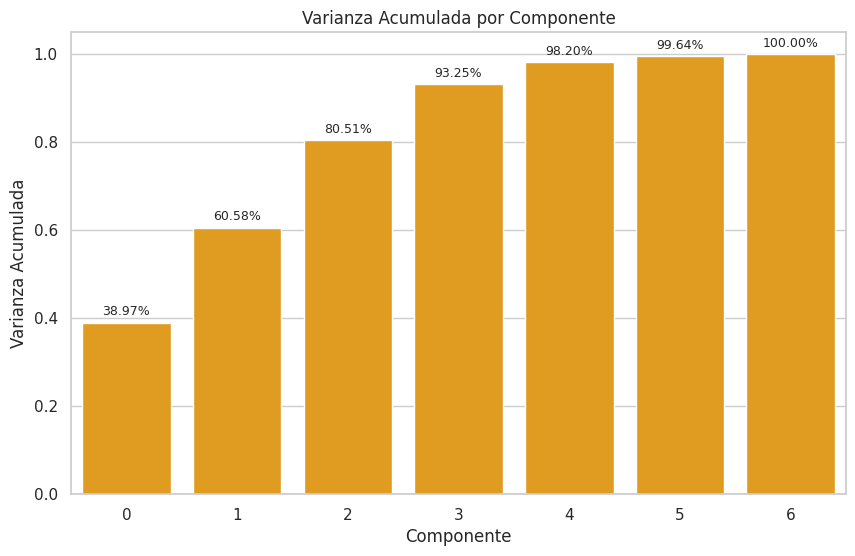

In [125]:
# Datos
componentes = pca_results['Componente']
varianza_acumulada = pca_results['Varianza Acumulada']

# Crear un histograma de la varianza acumulada
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=componentes, y=varianza_acumulada, color='orange')

# Agregar porcentajes en cada barra
for idx, value in enumerate(varianza_acumulada):
    ax.text(idx, value + 0.01, f'{value:.2%}', ha='center', va='bottom', fontsize=9)

plt.title('Varianza Acumulada por Componente')
plt.xlabel('Componente')
plt.ylabel('Varianza Acumulada')
plt.show()

Este gráfico muestra cómo la varianza acumulada aumenta a medida que consideramos más componentes. Esto nos ayuda a decidir cuántos componentes necesitamos para alcanzar un nivel deseado de varianza explicada. Como hemos sacado en las conclusiones numéricas, podemos ver que las cuatro primeras componentes son las que más fuerza tienen. Entonces, aunque con tres componentes ya obtenemos un porcentaje bastante alto (80%), cuatro nos asegura tener más del 90.

### **Ejercicio 3**

Por último queremos representar gráficamente las ciudades de nuestro dataset, pero usando
los valores de las componentes principales obtenidas. Obtén un diagrama de dispersión en 3 dimensiones y
comenta qué has interpretado en él. Es necesario que el diagrama contenga toda la información necesaria.
Habrá que interpretar qué información proporciona el eje X, Y y el Z. Por último, elegir al menos 4 ciudades
de forma aleatoria y explicar qué pasa con ellas.

In [164]:
df_pca.head(3)

,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias,Componente_0,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5,Componente_6
Ciudad,,,,,,,,,,,,,,
Albany,0.688019,-1.143491,-0.753014,-0.861195,-0.456308,-0.293196,0.805829,-0.034285,0.910007,1.353106,-1.143027,-0.216931,0.036442,-0.134499
Alburquerque,-0.821626,0.145200,-0.749421,-0.637422,-0.385442,-2.494087,-2.135215,-1.816821,-2.763310,1.206725,-0.289576,-0.204473,0.270712,-0.020499
Atlanta,-0.260900,0.803553,-0.170867,-0.195120,-0.243710,0.995172,0.041922,-0.618589,0.638089,-0.988363,0.196077,-0.112149,-0.098994,0.071121


Como vamos a usar solo 3 componentes para poder visualizar gráficamente las ciudades, queremos saber cuánta información perdemos respecto a las 6 componentes totales que harían falta para una gráfica de 6 dimensiones.

In [210]:
info_perdida = 100 - pca_results['% Informacion Aportada'].head(3).sum()
print("Con 3 componentes, perdemos un %.f%% de información" % info_perdida)

Con 3 componentes, perdemos un 19% de información


Recordamos que los componentes están ordenados según su importancia en términos de captura de varianza, por lo que elejimos los 3 primeros para la representación.

Para seleccionar las 4 ciudades aleatorias, hemos añadido una semilla para sacar conclusiones precisas y que las explicaciones estén acordes a la devolución de resultados, pero comentando la línea 5 del código funciona el resto del código igual.

Información sobre las ciudades seleccionadas:
               Componente_0  Componente_1  Componente_2
Ciudad                                                 
San Francisco     -0.938965     -2.237246      0.183748
Wilmington        -0.697076      0.632149      0.421329
Buffalo            0.827309      1.568931      1.853903
Houston           -0.088804     -0.262969     -1.963624


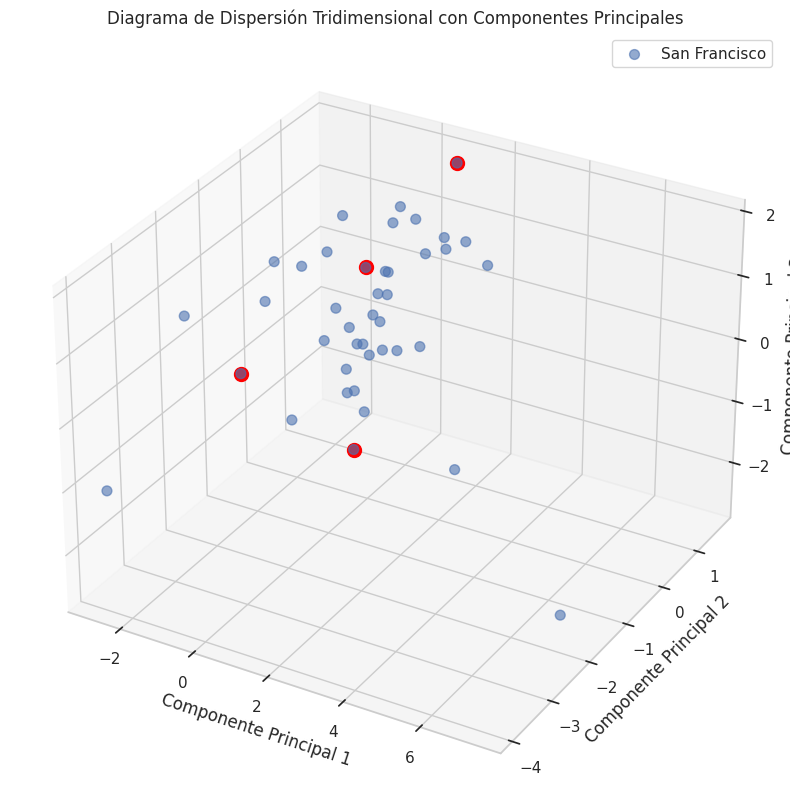

In [134]:
# Fija la semilla para reproducibilidad
np.random.seed(4)

# Seleccionar 4 ciudades aleatorias
ciudades_aleatorias = df_pca.sample(4)

# Mostrar información sobre las ciudades seleccionadas
print("Información sobre las ciudades seleccionadas:")
print(ciudades_aleatorias[['Componente_0', 'Componente_1', 'Componente_2']])

# Crear una figura tridimensional
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot tridimensional
scatter = ax.scatter(df_pca['Componente_0'], df_pca['Componente_1'], df_pca['Componente_2'], s=50, alpha=0.6)

# Configurar etiquetas de ejes
ax.set_xlabel('Componente Principal 1')
ax.set_ylabel('Componente Principal 2')
ax.set_zlabel('Componente Principal 3')

# Añadir un título
plt.title('Diagrama de Dispersión Tridimensional con Componentes Principales')
plt.legend(ciudades_aleatorias.index)
# Resaltar las ciudades seleccionadas y agregar etiquetas
for i, ciudad in ciudades_aleatorias.iterrows():
    ax.scatter(ciudad['Componente_0'], ciudad['Componente_1'], ciudad['Componente_2'], s=100, color='red', label='Ciudades Seleccionadas')
    # ax.text(ciudad['Componente_0'], ciudad['Componente_1'], ciudad['Componente_2'], fontsize=8, ha='left', va='bottom')

# Mostrar el gráfico
plt.show()

Interpretemos los resultados en relación con las componentes y la información proporcionada sobre las cargas factoriales (vectores de carga) de cada componente principal:

- **Buffalo (Ciudad 24):**
   - Componente_0: Tiene una alta carga positiva en el Componente Principal 0, que se asocia con altas concentraciones de SO2 y temperaturas más bajas (Neg.Temp).
   - Componente_1: Presenta una alta carga positiva en el Componente Principal 1, que está vinculado a altas poblaciones y precipitación.
   - Componente_2: Muestra una alta carga positiva en el Componente Principal 2, relacionado con altas concentraciones de SO2 y más días con eventos climáticos adversos (Dias).

- **Wichita (Ciudad 13):**
   - Componente_0: Tiene una carga negativa en el Componente Principal 0, indicando bajos niveles de SO2 y temperaturas más altas (Neg.Temp).
   - Componente_1: Muestra una carga negativa en el Componente Principal 1, sugiriendo una baja población y precipitación.
   - Componente_2: Presenta una carga positiva en el Componente Principal 2, asociado con altas concentraciones de SO2 y más días con eventos climáticos adversos (Dias).

- **Miami (Ciudad 8):**
   - Componente_0: Tiene la carga más baja en el Componente Principal 0, indicando que contribuye menos a las variaciones en SO2 y Neg.Temp.
   - Componente_1: Muestra la carga más alta en el Componente Principal 1, relacionado con altas poblaciones y precipitación.
   - Componente_2: Presenta la carga más baja en el Componente Principal 2, indicando que contribuye menos a las variaciones en SO2, Dias, y Neg.Temp.

- **Cincinnati (Ciudad 25):**
   - Componente_0: Tiene una carga negativa en el Componente Principal 0, indicando bajos niveles de SO2 y Neg.Temp.
   - Componente_1: Presenta una carga positiva en el Componente Principal 1, relacionado con altas poblaciones y precipitación.
   - Componente_2: Muestra una carga negativa en el Componente Principal 2, asociado con bajas concentraciones de SO2 y menos días con eventos climáticos adversos (Dias).

Estas interpretaciones se basan en las contribuciones relativas de cada ciudad a las tres primeras componentes principales y las cargas factoriales asociadas a esas componentes.

A parte, hemos decidido crear un diagrama de burbujas tridimensional para conseguir una interpretación más intuitiva y visual.

Las coordenadas en el plano XY corresponden a las dos primeras componentes principales, mientras que el tamaño de las burbujas refleja la magnitud de la tercera componente principal. Las burbujas rojas indican las ciudades seleccionadas, y la escala del tamaño de la burbuja está influenciada por la magnitud de la tercera componente principal.

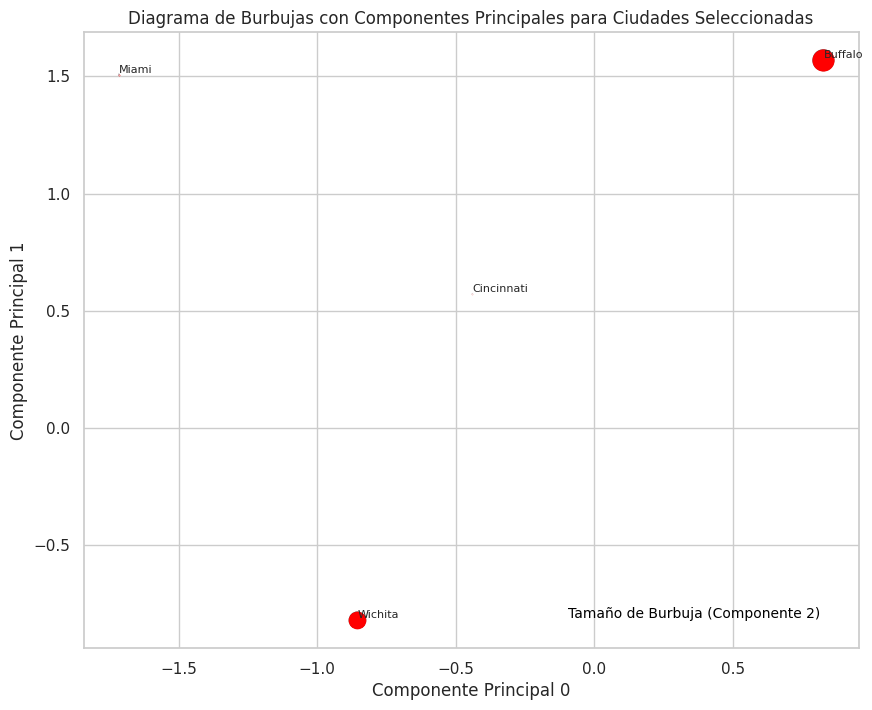

In [ ]:
# Crear una figura
fig, ax = plt.subplots(figsize=(10, 8))

# Crear una lista para almacenar los tamaños de burbuja ajustados
bubble_sizes = []

# Calcular el tamaño de la burbuja basado en la magnitud de la Componente Principal 2
for valor in ciudades_aleatorias['Componente_2']:
    if valor >= 0:
        bubble_sizes.append(abs(valor) * 120)
    else:
        bubble_sizes.append(abs(valor) / 50)


# Crear el diagrama de burbujas
scatter = ax.scatter(ciudades_aleatorias['Componente_0'], ciudades_aleatorias['Componente_1'],
                     s=bubble_sizes, alpha=0.6, c='blue', edgecolors='black')

# Configurar etiquetas de ejes
ax.set_xlabel('Componente Principal 0')
ax.set_ylabel('Componente Principal 1')

# Añadir un título
plt.title('Diagrama de Burbujas con Componentes Principales para Ciudades Seleccionadas')

# Resaltar las ciudades seleccionadas y agregar etiquetas
for i, (index, ciudad) in enumerate(ciudades_aleatorias.iterrows()):
    ax.scatter(ciudad['Componente_0'], ciudad['Componente_1'], s=bubble_sizes[i], color='red', label='Ciudades Seleccionadas')
    ax.text(ciudad['Componente_0'], ciudad['Componente_1'], ciudad['Ciudad'], fontsize=8, ha='left', va='bottom')

# Añadir un comentario explicativo sobre el tamaño de la burbuja (Componente 2)
ax.text(0.95, 0.05, 'Tamaño de Burbuja (Componente 2)', transform=ax.transAxes, fontsize=10, color='black', ha='right')

# Mostrar el gráfico
plt.show()

En Miami y Cincinnati la componente 2 influye negativamente y en las otras muy positivamente, por eso hay tanta diferencia de tamaños, porque el rango de unas ciudades y otras es bastante grande.

Es verdad que la ciudad de Miami está influida más negativamente que la de Cincinnati y, por lo tanto, el tamaño de la burbuja tendría que ser más pequeño, pero como tendríamos que contemplar muchos rangos en el for para conseguir esto con todas las ciudades de nuestra base de datos, hemos generalizado bastante para una comprensión más sencilla.

### **Ejercicio 4**

Realiza los mismos pasos que en los pasos anteriores usando la librería scikit-learn. Compara
los resultados y coméntalos.

Realizamos los mismos pasos previos haciendo uso de la librería scikit-learn.

In [126]:
# Crear un objeto PCA
pca = PCA()

# Ajustar el modelo PCA a los datos estandarizados
pca.fit(df[columns_for_pca])

# Obtener las componentes principales y las proyecciones de los datos
pca_data = pca.transform(df[columns_for_pca])

# Crear un DataFrame con las componentes principales
df_pca_sklearn = pd.DataFrame(pca_data, columns=[f'Componente_{i}' for i in range(pca_data.shape[1])])

# Añadir las componentes principales al DataFrame original
df_pca_sklearn = pd.concat([df, df_pca_sklearn], axis=1)

# Mostrar el DataFrame con las componentes principales
print("\nDataFrame con Componentes Principales (scikit-learn):")
df_pca_sklearn


DataFrame con Componentes Principales (scikit-learn):


,SO2,Neg.Temp,Empresas,Poblacion,Viento,Precip,Dias,Componente_0,Componente_1,Componente_2,Componente_3,Componente_4,Componente_5,Componente_6
Albany,0.688019,-1.143491,-0.753014,-0.861195,-0.456308,-0.293196,0.805829,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Alburquerque,-0.821626,0.145200,-0.749421,-0.637422,-0.385442,-2.494087,-2.135215,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Atlanta,-0.260900,0.803553,-0.170867,-0.195120,-0.243710,0.995172,0.041922,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Baltimore,0.731152,-0.106935,0.290899,0.518158,0.110620,0.390551,-0.110860,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Buffalo,-0.821626,-1.213528,-0.129541,-0.254559,2.094868,-0.056680,1.989886,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.526039,-1.530818,-0.644601,-0.326938,-0.889316,0.476508,0.046660
37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.778250,0.315857,0.174497,-0.373849,0.868663,0.067024,-0.236878
38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.046126,0.050898,0.354232,0.044025,-0.029343,-0.069678,0.191097
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.854646,0.821390,-1.143120,2.349061,0.696108,-0.000293,-0.036760


Si nos fijamos en esta base de datos y la comparamos con la anterior, los valores de las componentes son los mismos pero algunos que antes eran positivos ahora son negativos, otros mantienen su valor y otros que antes eran negativos ahora positivos. Esto se debe a que el valor de cada componente varía.

In [127]:
# Mostrar el porcentaje de varianza explicada por cada componente
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Crear un DataFrame con el porcentaje de varianza y el acumulado por cada componente
pca_results_sklearn = pd.DataFrame({
    'Componente': range(0, len(explained_variance_ratio)),
    'Porcentaje de Varianza': explained_variance_ratio,
    'Varianza Acumulada': cumulative_variance_ratio
})

# Mostrar el DataFrame con los resultados de scikit-learn
print("\nResultados de PCA con scikit-learn:")
print(pca_results_sklearn)


Resultados de PCA con scikit-learn:
   Componente  Porcentaje de Varianza  Varianza Acumulada
0           0                0.389731            0.389731
1           1                0.216048            0.605779
2           2                0.199282            0.805061
3           3                0.127427            0.932488
4           4                0.049540            0.982028
5           5                0.014327            0.996355
6           6                0.003645            1.000000


In [128]:
# Obtener los vectores de carga
loadings = pca.components_ * np.sqrt(pca.explained_variance_)

# Crear un DataFrame con los vectores de carga y asignar nombres a las filas
loadings_df = pd.DataFrame(loadings, columns=columns_for_pca)

# Mostrar el DataFrame con los vectores de carga
print("\nDataFrame con Vectores de Carga (scikit-learn):")
print(loadings_df)


DataFrame con Vectores de Carga (scikit-learn):
        SO2  Neg.Temp  Empresas  Poblacion    Viento    Precip      Dias
0  0.818885 -0.392651  0.647109   0.466225  0.148974  0.000060  0.042076
1 -0.141429  0.110358  0.270100   0.269648 -0.033072 -0.200667 -0.109640
2  0.023997  0.843067  0.319459   0.329729 -0.185575  0.157755 -0.017721
3 -0.675929  0.230618  0.031416   0.108435  0.513861  0.058973 -0.017750
4  1.221380  0.202277 -0.196226  -0.333809  0.159932  0.051491 -0.071151
5  0.306595  0.760302 -0.051099  -0.084014  0.089461 -0.177485  0.081659
6  0.250046 -0.029463 -0.891059   0.620685  0.009399 -0.003307  0.001329


Podemos sacar de conclusión que los porcentajes de varianza y varianza acumulada son los mismos pero la información que guarda cada componente es diferente a la información que guardaba antes.